In [10]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import scipy.stats
import pylab as plt
from matplotlib import pyplot as plt
from scipy import stats
import random
import math
import sklearn
from sklearn.mixture import GaussianMixture

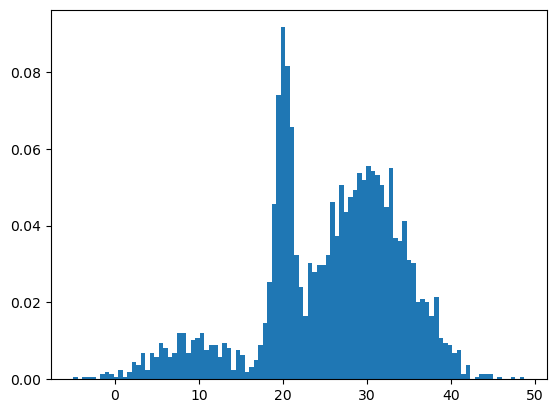

In [76]:
data = np.load("formationchannels.npy")
a,b,c=plt.hist(data,100,density=True)
plt.show()

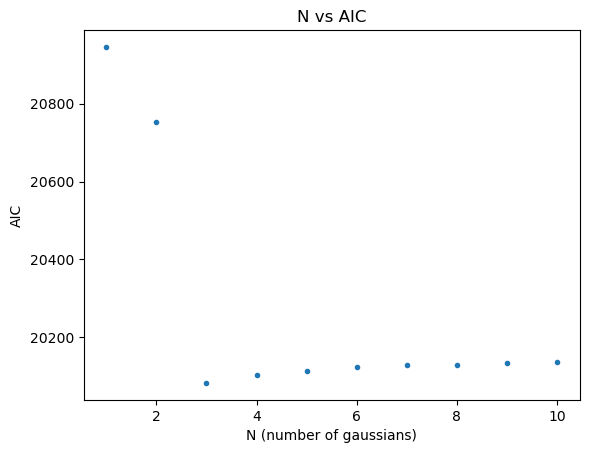

Minimum value for AIC: N =  3


In [77]:
aic = []
N = np.linspace(1,10,10,dtype=int)
for i in N:
    gm = GaussianMixture(n_components=i).fit(data)
    aic.append(gm.aic(data))
plt.plot(N,aic,'.')
plt.title('N vs AIC')
plt.xlabel('N (number of gaussians)')
plt.ylabel('AIC')
plt.show()
print('Minimum value for AIC: N = ', N[np.array(aic)==np.min(np.array(aic))][0])

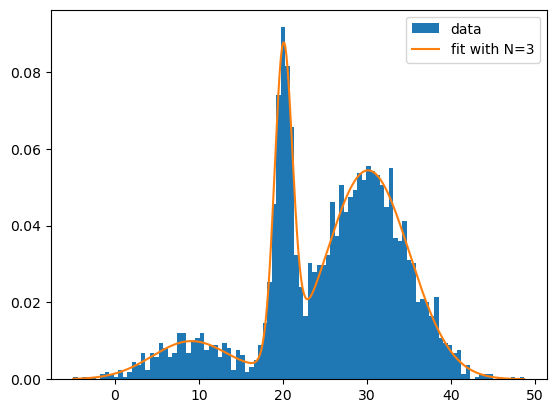

In [79]:
a,b,c=plt.hist(data,100,density=True,label='data')
gm = GaussianMixture(n_components=N[np.array(aic)==np.min(np.array(aic))][0]).fit(data)
plt.plot(np.linspace(np.min(data),np.max(data),1000),np.exp(gm.score_samples(np.linspace(np.min(data),np.max(data),1000)[:,np.newaxis])),label='fit with N=3')
plt.legend()
plt.show()